In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv, os

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [2]:
#a little data preprocessing

train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

y_train = train['label']
y_test = test['label']
del train['label']
del test['label']

# convert to numpy rep for keras
x_train = train.values
x_test = test.values 
y_train = y_train.values
y_test = y_test.values 

# normalization and change to gray scale
x_train = x_train/255
x_test = x_test/255

# reshape 
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)


(27455,)
(7172,)
(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [3]:
# find all unique labels: data for 9(J) and 25(Z) are missing
labels = np.array(np.unique(y_test))
numLabels = 24
print(labels)

# one hot encode the labels 
# for train set
ohe_labels_train = np.zeros((len(y_train), numLabels))
for i in range (len(y_train)):
    ohe_labels_train[i] = np.where(labels == y_train[i], 1, 0)

# for test set
ohe_labels_test = np.zeros((len(y_test), numLabels))
for i in range (len(y_test)):
    ohe_labels_test[i] = np.where(labels == y_test[i], 1, 0)



[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


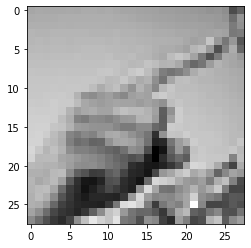

In [4]:
#plot an image 
plt.imshow(x_train[1], cmap = 'gray')

In [21]:
# convolutional model
model = Sequential()
model.add(Conv2D(filters=25, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(Conv2D(filters=25, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(Conv2D(filters=25, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(24, activation='softmax'))


# compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 25)        250       
                                                                 
 dropout_5 (Dropout)         (None, 28, 28, 25)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 25)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 25)        5650      
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 25)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 25)         0         
 g2D)                                                 

In [22]:
training = model.fit(x_train, ohe_labels_train, validation_split=0.2, epochs=150) 

Epoch 1/150
687/687 [==============================] - 21s 29ms/step - loss: 1.4276 - accuracy: 0.6174 - val_loss: 0.7598 - val_accuracy: 0.8239
Epoch 2/150
687/687 [==============================] - 20s 29ms/step - loss: 0.2557 - accuracy: 0.9400 - val_loss: 0.3117 - val_accuracy: 0.9337
Epoch 3/150
687/687 [==============================] - 20s 29ms/step - loss: 0.1007 - accuracy: 0.9772 - val_loss: 0.1298 - val_accuracy: 0.9843
Epoch 4/150
687/687 [==============================] - 20s 29ms/step - loss: 0.0616 - accuracy: 0.9857 - val_loss: 0.1011 - val_accuracy: 0.9772
Epoch 5/150
687/687 [==============================] - 20s 30ms/step - loss: 0.0401 - accuracy: 0.9907 - val_loss: 0.0937 - val_accuracy: 0.9818
Epoch 6/150
687/687 [==============================] - 20s 30ms/step - loss: 0.0317 - accuracy: 0.9923 - val_loss: 0.0843 - val_accuracy: 0.9771
Epoch 7/150
687/687 [==============================] - 21s 30ms/step - loss: 0.0293 - accuracy: 0.9927 - val_loss: 0.0270 - val_ac

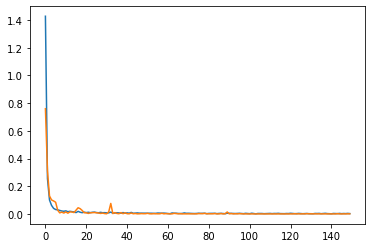

In [23]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.show()

In [24]:
score = model.evaluate(x_test, ohe_labels_test)
print('Test accuracy:', score[1])

225/225 [==============================] - 1s 6ms/step - loss: 0.0737 - accuracy: 0.9817
Test accuracy: 0.9817345142364502
